In [58]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

path = '../hp_outputs/'

r = pd.read_csv(path+'aucs.txt', delimiter=',', header=0)
auc_df = r.drop('N', axis=1)
r = pd.read_csv(path+'accs.txt', delimiter=',', header=0)
acc_df = r.drop('N', axis=1)
r = pd.read_csv(path+'f1s.txt', delimiter=',', header=0)
f1_df = r.drop('N', axis=1)

In [49]:
plots(acc_df, 'Accuracy', 'Accuracy for Baselines')

In [65]:
plots(auc_df, 'AUC score', 'AUC Score for Baselines with tuning')

In [53]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plots(df, ylabel, tit):
    df.boxplot(return_type='axes', figsize=(20,8))
    plt.ylabel(ylabel)
    plt.title(tit)
    plt.savefig(tit+'.png')
    plt.close()

In [54]:
import os, pandas as pd, numpy as np

columns = ['RF','XGB','BagC','LogR','GNB','ABC','KNN','MLP','SVM', 'Dataset Name']
path = '../hp_outputs'

hstrees_auc = [0.621680, 0.674359, 0.577098, 0.640739, 0.766083, 'na', 0.745146, 0.624644, 0.509829, 0.620995, 0.623216, 0.600886, 0.544145, 0.820991]
if_auc = [0.633009, 0.679623, 0.660665, 0.657287, 0.770199, 0.641989, 0.756163, 0.645090, 0.489113, 0.622291, 0.599032, 0.624610, 0.595173, 0.820991]
hstrees_auc[5] = np.mean([i for i in hstrees_auc if i != 'na'])

accs = []
aucs = []
f1s = []
topks_10 = []
topks_5 = []
topks_15 = []

for dirs, folders, files in os.walk(path):
    for file in files:
        if 'acc.csv' in file:
            accs.append(pd.read_csv(os.path.join(dirs, file), delimiter=',', header=0).values[0].tolist()[1:])
        elif 'auc.csv' in file:
            aucs.append(pd.read_csv(os.path.join(dirs, file), delimiter=',', header=0).values[0].tolist()[1:])
        elif 'f1.csv' in file:
            f1s.append(pd.read_csv(os.path.join(dirs, file), delimiter=',', header=0).values[0].tolist()[1:])
        elif '10_topk.csv' in file:
            topks_10.append(pd.read_csv(os.path.join(dirs, file), delimiter=',', header=0).values[0].tolist()[1:])
        elif '_5_topk.csv' in file:
            topks_5.append(pd.read_csv(os.path.join(dirs, file), delimiter=',', header=0).values[0].tolist()[1:])
        elif '_15_topk.csv' in file:
            topks_15.append(pd.read_csv(os.path.join(dirs, file), delimiter=',', header=0).values[0].tolist()[1:])
            
accs_df = pd.DataFrame(accs, columns=columns)
aucs_df = pd.DataFrame(aucs, columns=columns)
aucs_df['hstrees'] = hstrees_auc
aucs_df['iforest'] = if_auc
f1s_df = pd.DataFrame(f1s, columns=columns)
topks_10_df = pd.DataFrame(topks_10, columns=columns)
topks_5_df = pd.DataFrame(topks_5, columns=columns)
topks_15_df = pd.DataFrame(topks_15, columns=columns)

In [55]:
plots(aucs_df.loc[:, aucs_df.columns != 'Dataset Name'], 'AUC', 'AUC Scores Over All Datasets')

In [56]:
plots(topks_10_df.loc[:, topks_10_df.columns != 'Dataset Name'], 'top-10%', 'Number of correct anomalies in top-10 Over All Datasets')

In [57]:
plots(topks_5_df.loc[:, topks_5_df.columns != 'Dataset Name'], 'top-5%', 'Number of correct anomalies in top-5 Over All Datasets')

In [58]:
plots(topks_15_df.loc[:, topks_15_df.columns != 'Dataset Name'], 'top-15%', 'Number of correct anomalies in top-15 Over All Datasets')

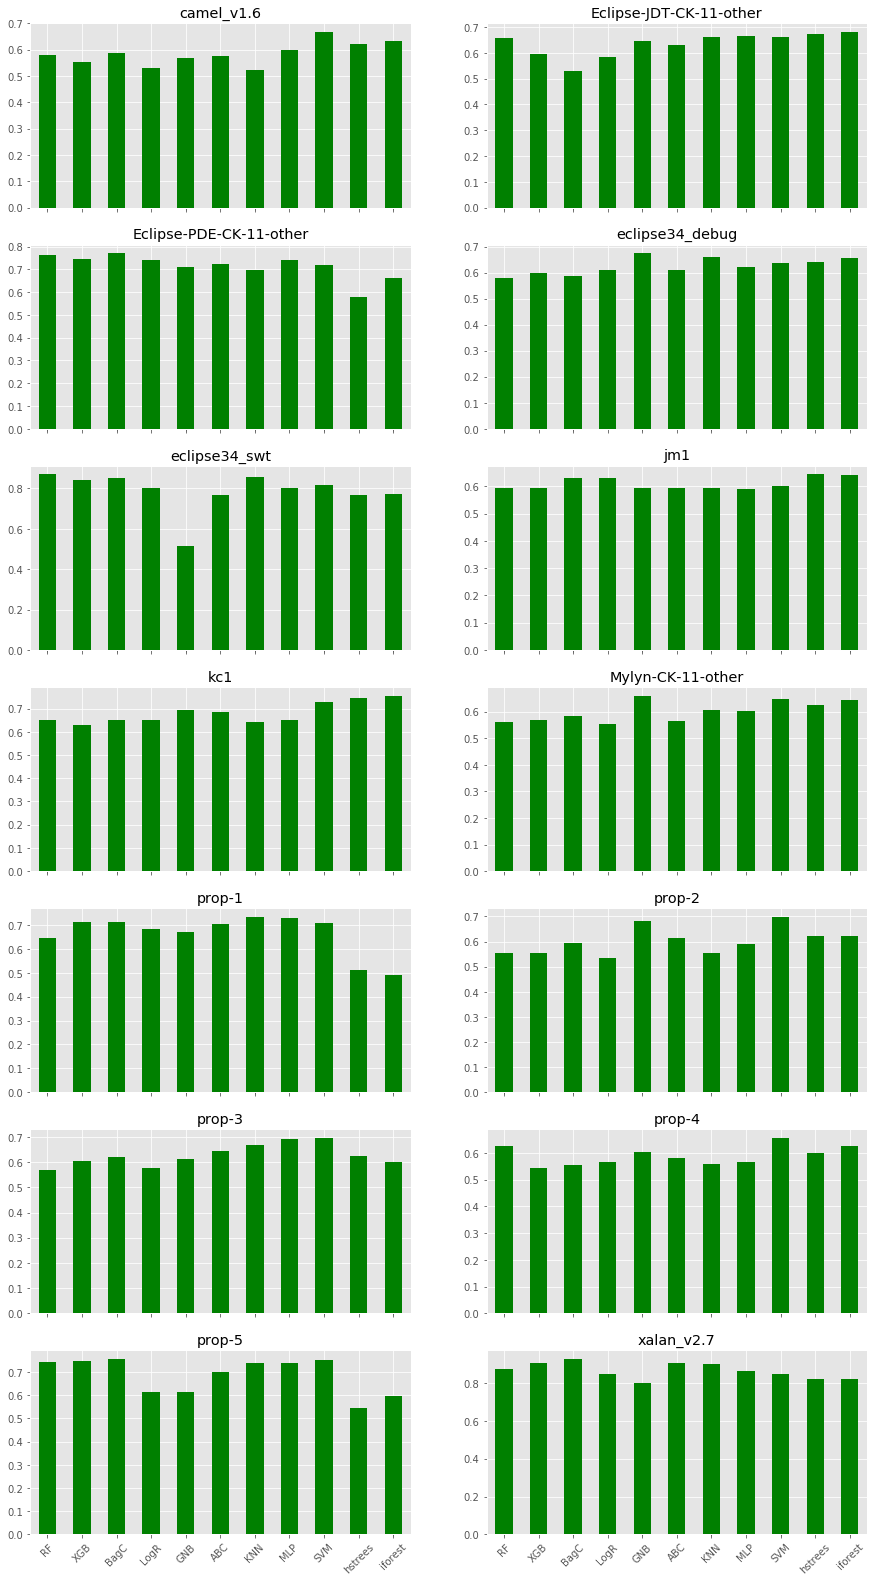

In [122]:
ax = aucs_df.set_index('Dataset Name').T.plot.bar(subplots=True, figsize=(15,40), layout=(10,2), legend=False, color='green', rot=45)

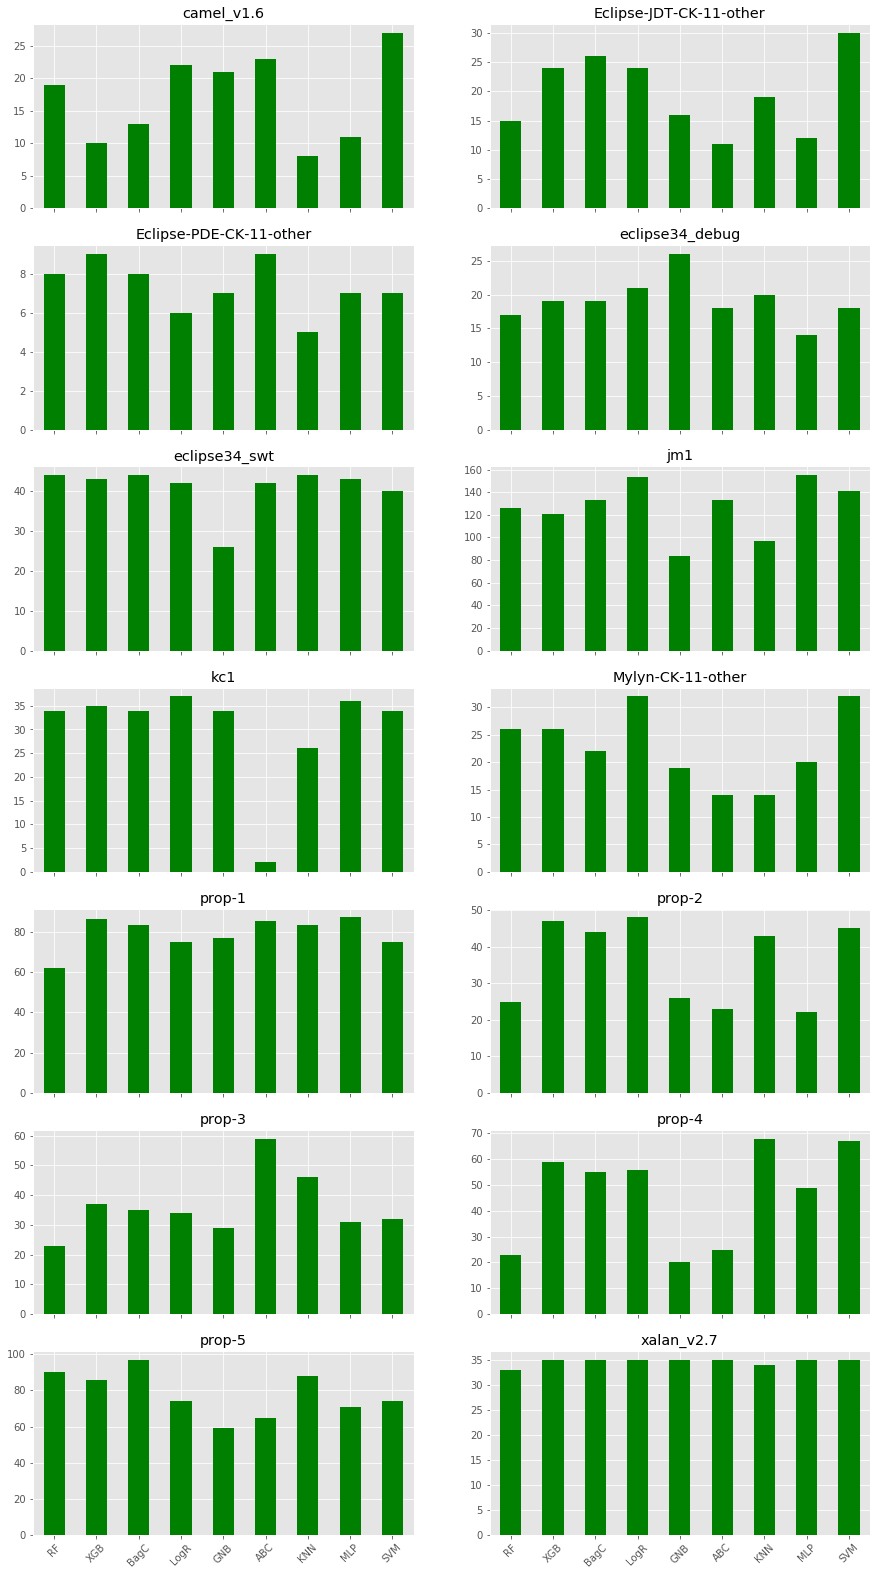

In [118]:
ax = topks_10_df.set_index('Dataset Name').T.plot.bar(subplots=True, figsize=(15,40), layout=(10,2), legend=False, color='green', rot=45)

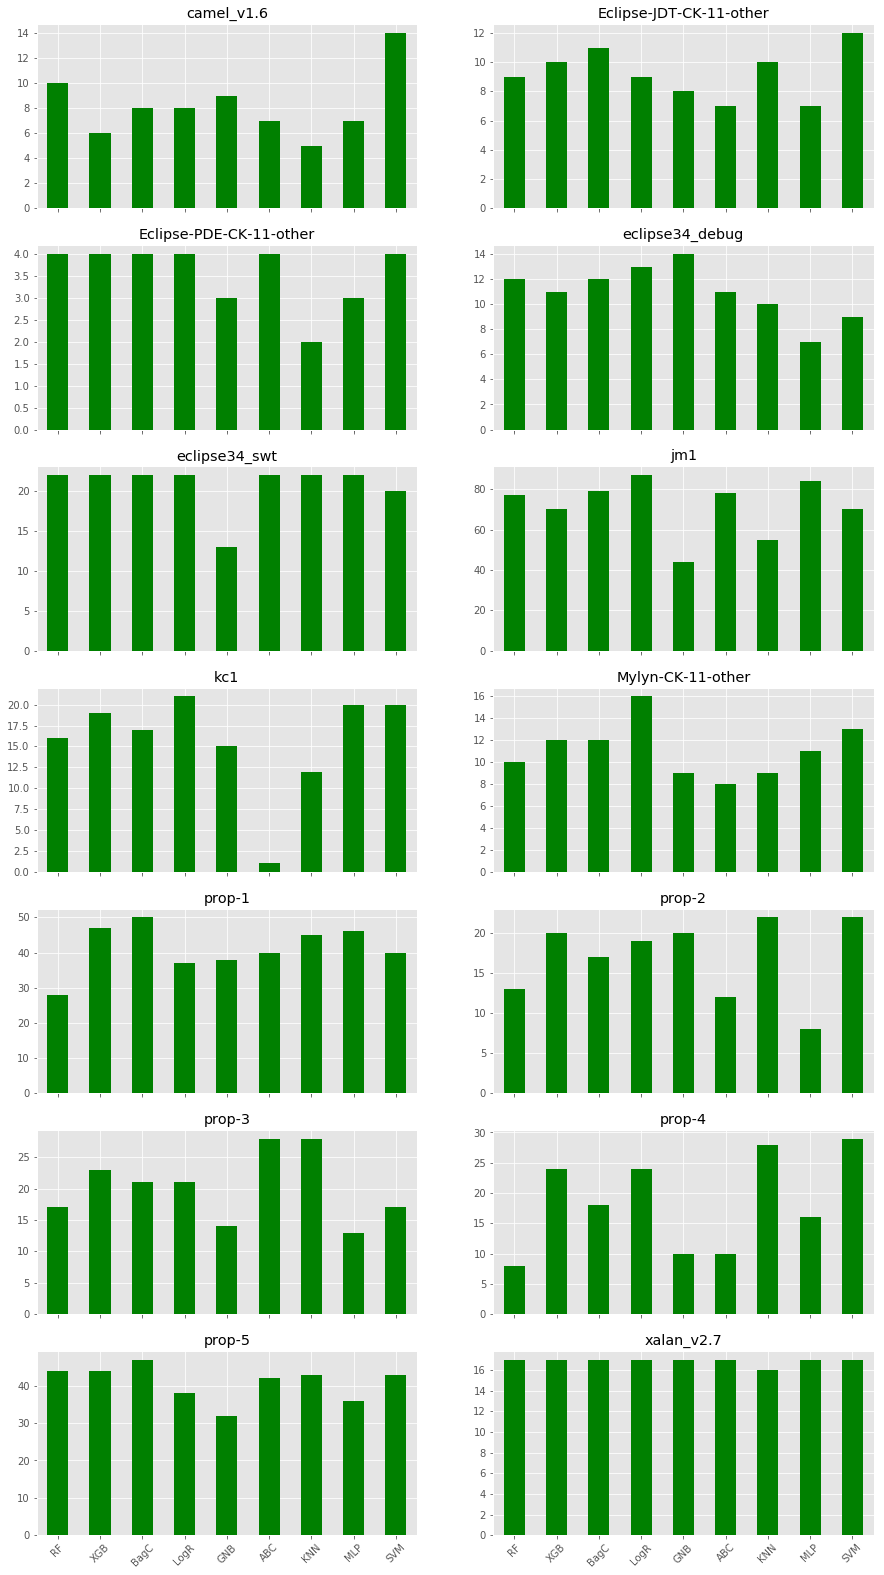

In [119]:
ax = topks_5_df.set_index('Dataset Name').T.plot.bar(subplots=True, figsize=(15,40), layout=(10,2), legend=False, color='green', rot=45)

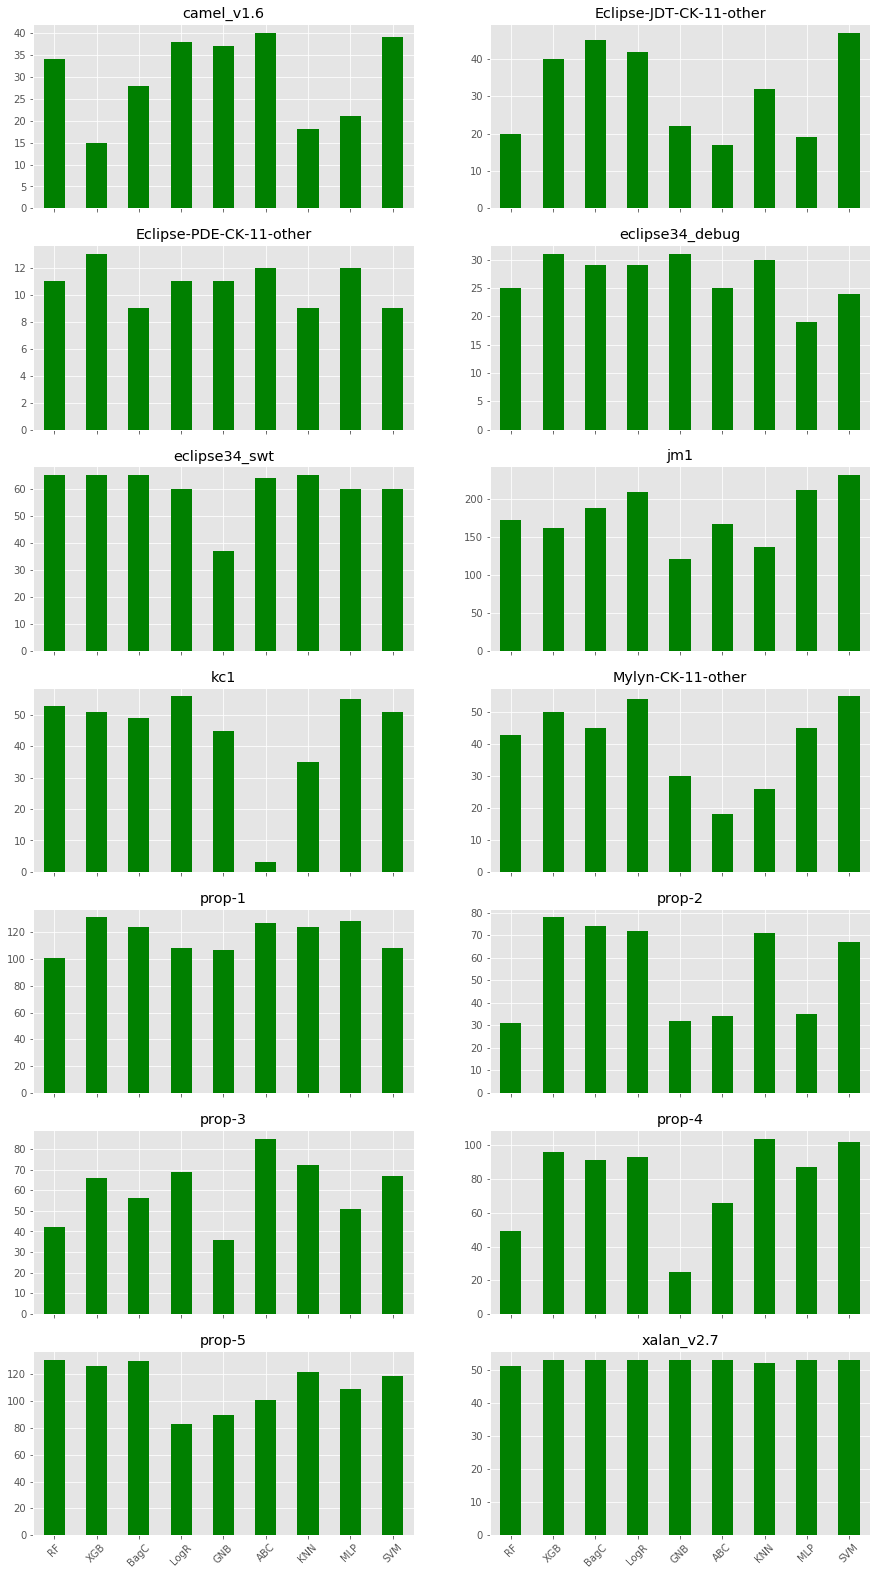

In [120]:
ax = topks_15_df.set_index('Dataset Name').T.plot.bar(subplots=True, figsize=(15,40), layout=(10,2), legend=False, color='green', rot=45)